In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import  datetime
from dateutil.parser import parse
from IPython.display import HTML
import seaborn as sns
from matplotlib.ticker import FuncFormatter
%matplotlib inline

In [2]:
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The raw code for this IPython notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')

In [3]:
RATE = 150
all_df = pd.DataFrame()

In [4]:
CDOC = pd.read_csv("CDOC.csv")
CITY = pd.read_csv("CITY.csv")
CAR = pd.read_csv("CAR.csv")
DANCE = pd.read_csv("DANCE.csv")
FYC = pd.read_csv("FYC.csv")
MAR = pd.read_csv("MAR.csv")
OA = pd.read_csv("OA.csv")
SHD = pd.read_csv("SHD.csv")
SLF = pd.read_csv("SLF.csv")
SPACE = pd.read_csv("SPACE.csv")
UC = pd.read_csv("UC.csv")
US = pd.read_csv("US.csv")
GCSC = pd.read_csv("GCSC.csv")

BUDGET = pd.read_csv("BUDGET.csv", index_col=0)

In [5]:
projects = [
    CDOC,
    CITY,
    CAR,
    DANCE,
    FYC,
    MAR,
    OA,
    SHD,
    SLF,
    SPACE,
    UC,
    US,
    GCSC
]

In [6]:
def get_info(df):
    df.columns = [c.replace(' ', '_') for c in df.columns]
    
    client = df.Client[0]
    
    df['Date'] = pd.to_datetime(df['Date'])
    launch = df['Date'].max()
    year = launch.year
    
    df_Designers = df.loc[df['Roles'] == 'Design'].copy()
    df_Designers_Hours = df_Designers[['First_Name', 'Hours']].copy()
    df_Designers_Grouped = df_Designers_Hours.groupby(['First_Name']).sum().reset_index()
    df_Designers_Sorted = df_Designers_Grouped.sort_values(by=['Hours'], ascending=False)
    lead_designer = df_Designers_Sorted['First_Name'].iloc[0]
    
    df_Developers = df.loc[df['Roles'] == 'Developer'].copy()
    df_Developers_Hours = df_Developers[['First_Name', 'Hours']].copy()
    df_Developers_Grouped = df_Developers_Hours.groupby(['First_Name']).sum().reset_index()
    df_Developers_Sorted = df_Developers_Grouped.sort_values(by=['Hours'], ascending=False)
    lead_developer = df_Developers_Sorted['First_Name'].iloc[0]
    
    design = int(df.loc[df['Roles'] == 'Design', 'Hours'].sum().round())
    develop = int(df.loc[df['Roles'] == 'Developer', 'Hours'].sum().round())
    total = design + develop
    cost = RATE * total
    
    df_dict = {}
    df_dict.setdefault(client, [])
    df_dict[client].append(year)
    df_dict[client].append(lead_designer)
    df_dict[client].append(lead_developer)
    df_dict[client].append(design)
    df_dict[client].append(develop)
    df_dict[client].append(total)
    df_dict[client].append(cost)

    
    df_new = pd.DataFrame(df_dict)
    df_new = df_new.transpose()
    return(df_new)

In [7]:
for project in projects:
    df = get_info(project)
    all_df = pd.concat([all_df, df])

In [8]:
all_df.columns = ["Year", "Designer", "Developer", "Design", "Development", "Total", "Cost"]

In [9]:
all_df = all_df.join(BUDGET).fillna(40000)


In [10]:
all_df['Profit'] = all_df['Budget'] - all_df['Cost']

In [11]:
all_df.sort_values(by=['Profit'])

,Year,Designer,Developer,Design,Development,Total,Cost,Budget,Profit
Milestone Autism Resources,2019,Joshua,Kory,123,330,453,67950,38500.0,-29450.0
Ursuline College,2018,Teresa,Michael,487,558,1045,156750,140000.0,-16750.0
DANCE Cleveland,2019,Teresa,Ashleigh,80,184,264,39600,23500.0,-16100.0
Spaces Gallery,2019,Teresa,Ashleigh,74,221,295,44250,35000.0,-9250.0
Gordon Square,2018,Joshua,Ashleigh,56,137,193,28950,20000.0,-8950.0
Oberlin College,2019,Teresa,Kory,51,83,134,20100,12000.0,-8100.0
First Year Cleveland,2019,Joshua,Cameron,75,189,264,39600,38000.0,-1600.0
Ursuline Sisters,2018,Joshua,Michael,58,142,200,30000,35000.0,5000.0
Sol Harris Day,2018,Joshua,Ashleigh,56,153,209,31350,38000.0,6650.0
Saint Luke's Foundation,2019,Joshua,Michael,73,90,163,24450,40000.0,15550.0


In [24]:
def bullet_chart(df):
  y_pos = np.arange(len(df.index))

  #Initialize plot
  fig, ax = plt.subplots(figsize=(12,6))
  ax.barh(y_pos, df["Budget"], height=0.5, align='center', color='green', label = "budget")
  ax.barh(y_pos, df["Cost"], height=0.2, align='center',color="red", label = "actual")
  ax.set_yticklabels(df["Client"])
  ax.set_yticks(y_pos)
  ax.invert_yaxis()

  plt.legend(loc=(0.35,1.0))
  ax.spines['left'].set_linewidth(0.2)
  ax.spines['bottom'].set_linewidth(0)
  ax.spines['right'].set_linewidth(0)
  ax.spines['top'].set_linewidth(0)
  fig.subplots_adjust(left=0.2, top=0.8)

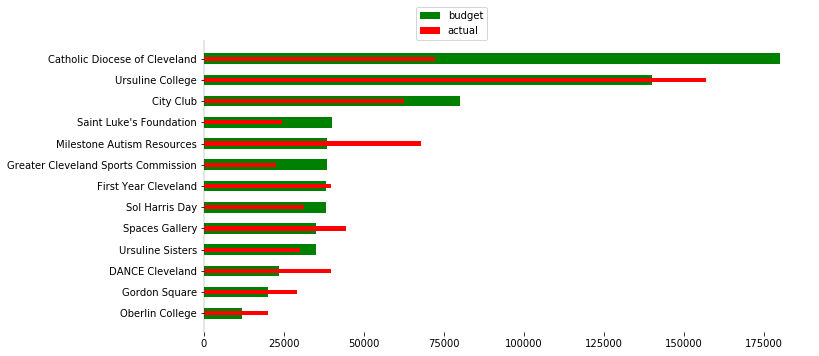

In [25]:
bullet_df = all_df[["Budget", "Cost"]]
bullet_client = bullet_df.reset_index()
bullet_client.columns = ['Client', 'Budget', 'Cost']
bullet_sorted = bullet_client.sort_values(by=['Budget'], ascending = False)
bullet_chart(bullet_sorted)

Text(0.5, 0, 'Development Hours')

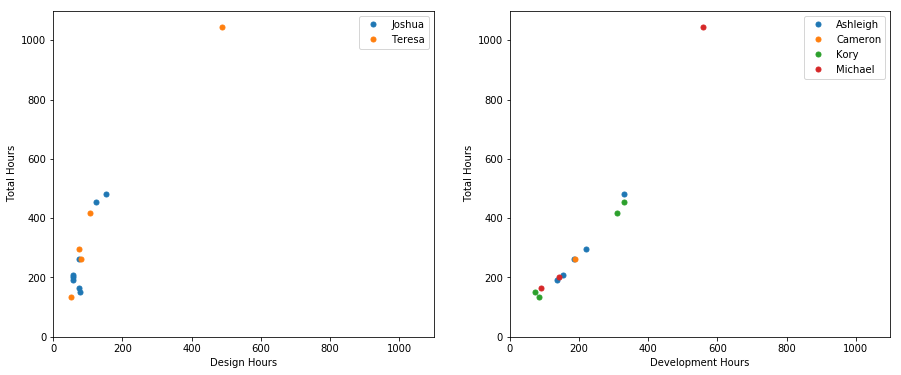

In [32]:
df_design = all_df[['Designer', 'Design', 'Total']].copy()
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,6))
designers = df_design.groupby('Designer')
for name, designer in designers:
    axes[0].plot(designer.Design, designer.Total, marker='o', linestyle="", ms = 5, label=name)
axes[0].legend(numpoints=1)
axes[0].set_ylim((0,1100))
axes[0].set_xlim((0,1100))
axes[0].set_ylabel('Total Hours')
axes[0].set_xlabel('Design Hours')


df_develop = all_df[['Developer', 'Development', 'Total']].copy()
developers = df_develop.groupby('Developer')
for name, developer in developers:
    axes[1].plot(developer.Development, developer.Total, marker='o', linestyle="", ms = 5, label=name)
axes[1].legend(numpoints=1)
axes[1].set_ylim((0,1100))
axes[1].set_xlim((0,1100))
axes[1].set_ylabel("Total Hours")
axes[1].set_xlabel("Development Hours")